# Standard Distribution Simulation

This is a very simple way of displaying how standard deviation occurs through simulation. `n` "marbles" are dropped from a height of `x`, and each step down they have a 50/50 chance of moving to the left, or to the right. The endpoints of the marbles is recorded and displayed. This should show how standard deviation occurs.

This is essentially a random walk along the number line for `x` 1-step steps.

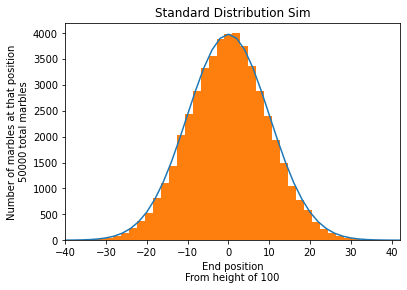

In [206]:
height = 100
marbles = 50000
simPositions = [None] * marbles
# I've been doing empty lists and appending to them, but I believe this is more efficient
import random, secrets
random.seed(secrets.randbits(100))
for i in range(marbles):
    position = 0
    for drop in range(height):
        if (random.random() >= .5):
            position += 1
        else:
            position -= 1
    simPositions[i] = position

import math
mathPositionsX = [None] * (height + 1)
mathPositionsY = [None] * (height + 1)
# we could mirror the values but I'm too lazy to get that working properly
for i in range(height + 1):
    probability = (math.factorial(height) / (math.factorial(i) * math.factorial(height - i))) / (2 ** height)
    mathPositionsY[i] = probability * marbles
    mathPositionsX[i] = int(height - (i * 2))

import matplotlib.pyplot as plt
bins = len(set(simPositions))
plt.title("Standard Distribution Sim")
plt.xlabel(f"End position\nFrom height of {height}")
plt.ylabel(f"Number of marbles at that position\n{marbles} total marbles")
plt.plot(mathPositionsX, mathPositionsY)
plt.hist(simPositions, bins)
plt.xlim(min(simPositions), max(simPositions))
plt.show()

What is interesting with this is it appears you can see why "pseudo random" because there are rather noticeable jumps in the graph, even with large marble counts... Sometimes there are very large spikes that are statistically unlikely.

Heck, we can calculate the probability of a marble landing at any given point, why don't we compare this mathematically calculated value with our above histogram?

If I remember correctly, the odds of landing at any given point on the graph can be modeled with pascal's triangle (man this thing comes up everywhere). However I think it would be fun if I was able to calculate the odds of it myself. This only works if `distance from 0` is a valid distance (IE no in between or large distances that the random path can't reach). This took me a while to arrive to because I was trying to figure this out without googling how the pascal triangle worked. I did eventually figure it out without external assistance! I am proud of myself.

The formula for the probability is simply `height C index / 2^height`

Something that I've noticed is that there are sometimes *significant* outliers... It makes me wonder if this is due to the pseudo-randomness of the random function, or if these are just random occurrences.